In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pylab as plt 

In [2]:
plt.rc('text', usetex=True)
plt.rc('font',**{'family':'sans-serif','serif':['Palatino']})
figSize  = (12, 8)
fontSize = 20

# Illustrate LHS with Inducing Points

In [3]:
lhs_1 = pd.read_csv('data/lhs_16.csv', index_col=0)
lhs_2 = pd.read_csv('data/lhs_4.csv', index_col=0)

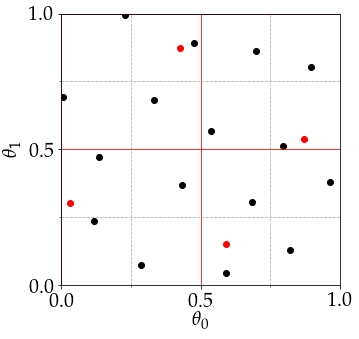

In [4]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(lhs_1['V1'], lhs_1['V2'], marker = 'o', c = 'k')
ax.scatter(lhs_2['V1'], lhs_2['V2'], marker = 'o', c = 'r')
ax.set_yticks(np.linspace(0.0, 1.0, 3), minor=False)
ax.set_yticks(np.linspace(0.0, 1.0, 5), minor=True)
ax.set_xticks(np.linspace(0.0, 1.0, 3), minor=False)
ax.set_xticks(np.linspace(0.0, 1.0, 5), minor=True)
ax.yaxis.grid(True, which='major', linestyle = '-', c = 'r')
ax.yaxis.grid(True, which='minor', linestyle = '--')
ax.xaxis.grid(True, which='major', linestyle = '-', c = 'r')
ax.xaxis.grid(True, which='minor', linestyle = '--')
ax.set_xlim(0.0, 1.0)
ax.set_ylim(0.0, 1.0)
plt.ylabel(r'$\theta_{1}$', fontsize = fontSize)
plt.xlabel(r'$\theta_{0}$', fontsize = fontSize)
plt.tick_params(axis='x', labelsize=fontSize)
plt.tick_params(axis='y', labelsize=fontSize)
plt.show()

# Testing Sparse GP

In [1]:
import torch
from src.gp.sparseGP import GaussianProcess

In [6]:
inputs = torch.rand(100, 2) # torch.from_numpy(lhs_1.values)
inducing = torch.rand(20, 2) # torch.from_numpy(lhs_2.values)
yvals = torch.sin(inputs[:,0]) * torch.cos(inputs[:,1])

In [7]:
test = GaussianProcess(inputs, yvals, inducing, 1E-5)

In [8]:
params = torch.Tensor([-1.0, 0., 0.])

In [9]:
test.cost_function(params)

tensor([2.9730e+00+0.j, 1.3753e+00+0.j, 9.0810e-01+0.j, 6.0795e-01+0.j, 5.5896e-01+0.j,
        3.0321e-01+0.j, 2.0595e-01+0.j, 1.4739e-01+0.j, 1.0413e-01+0.j, 6.9291e-02+0.j,
        4.4022e-02+0.j, 2.3569e-02+0.j, 1.2494e-02+0.j, 1.0794e-02+0.j, 6.0175e-03+0.j,
        4.4145e-03+0.j, 1.8728e-03+0.j, 5.1984e-06+0.j, 6.7734e-04+0.j, 3.9845e-04+0.j])
tensor([ 2.6801e+01+0.j,  9.5992e+00+0.j,  5.4098e+00+0.j,  1.5651e+00+0.j,
         1.1881e+00+0.j,  6.1669e-01+0.j,  2.1547e-01+0.j,  1.1689e-01+0.j,
         4.7925e-02+0.j,  2.6327e-02+0.j,  1.4468e-02+0.j,  4.1514e-03+0.j,
         2.2105e-03+0.j,  1.0457e-03+0.j,  5.8046e-04+0.j,  2.0411e-04+0.j,
         6.1759e-05+0.j,  1.9385e-05+0.j,  3.4582e-06+0.j, -2.0200e-07+0.j])


tensor([[4.2215e+09]])

In [6]:
d = test.optimisation(params, 500, 0.01, 2)

tensor(-1842.0680) tensor(-89.9171, grad_fn=<MulBackward0>) tensor(-66.6449, grad_fn=<MulBackward0>)
tensor(6.3717e+09, grad_fn=<MulBackward0>) tensor([[3.3398e+09]], grad_fn=<MmBackward0>) tensor(-1865.3402, grad_fn=<SubBackward0>)
tensor(-1842.0680) tensor(-93.0080, grad_fn=<MulBackward0>) tensor(-67.6275, grad_fn=<MulBackward0>)
tensor(5.9747e+09, grad_fn=<MulBackward0>) tensor([[3.1122e+09]], grad_fn=<MmBackward0>) tensor(-1867.4484, grad_fn=<SubBackward0>)
tensor(-1842.0680) tensor(-94.0693, grad_fn=<MulBackward0>) tensor(-68.6140, grad_fn=<MulBackward0>)
tensor(5.6009e+09, grad_fn=<MulBackward0>) tensor([[2.9301e+09]], grad_fn=<MmBackward0>) tensor(-1867.5233, grad_fn=<SubBackward0>)
tensor(-1842.0680) tensor(-95.2322, grad_fn=<MulBackward0>) tensor(-69.6059, grad_fn=<MulBackward0>)
tensor(5.2490e+09, grad_fn=<MulBackward0>) tensor([[2.7269e+09]], grad_fn=<MmBackward0>) tensor(-1867.6943, grad_fn=<SubBackward0>)
tensor(-1842.0680) tensor(-97.2871, grad_fn=<MulBackward0>) tensor(-

tensor(-1842.0680) tensor(-133.3585, grad_fn=<MulBackward0>) tensor(-81.0153, grad_fn=<MulBackward0>)
tensor(2.3873e+09, grad_fn=<MulBackward0>) tensor([[-2.9649e+16]], grad_fn=<MmBackward0>) tensor(-1894.4113, grad_fn=<SubBackward0>)
tensor(-1842.0680) tensor(-133.3585, grad_fn=<MulBackward0>) tensor(-81.0153, grad_fn=<MulBackward0>)
tensor(2.3873e+09, grad_fn=<MulBackward0>) tensor([[-2.9649e+16]], grad_fn=<MmBackward0>) tensor(-1894.4113, grad_fn=<SubBackward0>)
tensor(-1842.0680) tensor(-133.3585, grad_fn=<MulBackward0>) tensor(-81.0153, grad_fn=<MulBackward0>)
tensor(2.3873e+09, grad_fn=<MulBackward0>) tensor([[-2.9649e+16]], grad_fn=<MmBackward0>) tensor(-1894.4113, grad_fn=<SubBackward0>)
tensor(-1842.0680) tensor(-133.3585, grad_fn=<MulBackward0>) tensor(-81.0153, grad_fn=<MulBackward0>)
tensor(2.3873e+09, grad_fn=<MulBackward0>) tensor([[-2.9649e+16]], grad_fn=<MmBackward0>) tensor(-1894.4113, grad_fn=<SubBackward0>)
tensor(-1842.0680) tensor(-133.3585, grad_fn=<MulBackward0>)

tensor(-1842.0680) tensor(-133.3585, grad_fn=<MulBackward0>) tensor(-81.0153, grad_fn=<MulBackward0>)
tensor(2.3873e+09, grad_fn=<MulBackward0>) tensor([[-2.9649e+16]], grad_fn=<MmBackward0>) tensor(-1894.4113, grad_fn=<SubBackward0>)
tensor(-1842.0680) tensor(-133.3585, grad_fn=<MulBackward0>) tensor(-81.0153, grad_fn=<MulBackward0>)
tensor(2.3873e+09, grad_fn=<MulBackward0>) tensor([[-2.9649e+16]], grad_fn=<MmBackward0>) tensor(-1894.4113, grad_fn=<SubBackward0>)
tensor(-1842.0680) tensor(-133.3585, grad_fn=<MulBackward0>) tensor(-81.0153, grad_fn=<MulBackward0>)
tensor(2.3873e+09, grad_fn=<MulBackward0>) tensor([[-2.9649e+16]], grad_fn=<MmBackward0>) tensor(-1894.4113, grad_fn=<SubBackward0>)
tensor(-1842.0680) tensor(-133.3585, grad_fn=<MulBackward0>) tensor(-81.0153, grad_fn=<MulBackward0>)
tensor(2.3873e+09, grad_fn=<MulBackward0>) tensor([[-2.9649e+16]], grad_fn=<MmBackward0>) tensor(-1894.4113, grad_fn=<SubBackward0>)
tensor(-1842.0680) tensor(-133.3585, grad_fn=<MulBackward0>)

tensor(2.3873e+09, grad_fn=<MulBackward0>) tensor([[-2.9649e+16]], grad_fn=<MmBackward0>) tensor(-1894.4113, grad_fn=<SubBackward0>)
tensor(-1842.0680) tensor(-133.3585, grad_fn=<MulBackward0>) tensor(-81.0153, grad_fn=<MulBackward0>)
tensor(2.3873e+09, grad_fn=<MulBackward0>) tensor([[-2.9649e+16]], grad_fn=<MmBackward0>) tensor(-1894.4113, grad_fn=<SubBackward0>)
tensor(-1842.0680) tensor(-133.3585, grad_fn=<MulBackward0>) tensor(-81.0153, grad_fn=<MulBackward0>)
tensor(2.3873e+09, grad_fn=<MulBackward0>) tensor([[-2.9649e+16]], grad_fn=<MmBackward0>) tensor(-1894.4113, grad_fn=<SubBackward0>)
tensor(-1842.0680) tensor(-133.3585, grad_fn=<MulBackward0>) tensor(-81.0153, grad_fn=<MulBackward0>)
tensor(2.3873e+09, grad_fn=<MulBackward0>) tensor([[-2.9649e+16]], grad_fn=<MmBackward0>) tensor(-1894.4113, grad_fn=<SubBackward0>)
tensor(-1842.0680) tensor(-133.3585, grad_fn=<MulBackward0>) tensor(-81.0153, grad_fn=<MulBackward0>)
tensor(2.3873e+09, grad_fn=<MulBackward0>) tensor([[-2.9649e

tensor(2.3873e+09, grad_fn=<MulBackward0>) tensor([[-2.9649e+16]], grad_fn=<MmBackward0>) tensor(-1894.4113, grad_fn=<SubBackward0>)
tensor(-1842.0680) tensor(-133.3585, grad_fn=<MulBackward0>) tensor(-81.0153, grad_fn=<MulBackward0>)
tensor(2.3873e+09, grad_fn=<MulBackward0>) tensor([[-2.9649e+16]], grad_fn=<MmBackward0>) tensor(-1894.4113, grad_fn=<SubBackward0>)
tensor(-1842.0680) tensor(-133.3585, grad_fn=<MulBackward0>) tensor(-81.0153, grad_fn=<MulBackward0>)
tensor(2.3873e+09, grad_fn=<MulBackward0>) tensor([[-2.9649e+16]], grad_fn=<MmBackward0>) tensor(-1894.4113, grad_fn=<SubBackward0>)
tensor(-1842.0680) tensor(-133.3585, grad_fn=<MulBackward0>) tensor(-81.0153, grad_fn=<MulBackward0>)
tensor(2.3873e+09, grad_fn=<MulBackward0>) tensor([[-2.9649e+16]], grad_fn=<MmBackward0>) tensor(-1894.4113, grad_fn=<SubBackward0>)
tensor(-1842.0680) tensor(-133.3585, grad_fn=<MulBackward0>) tensor(-81.0153, grad_fn=<MulBackward0>)
tensor(2.3873e+09, grad_fn=<MulBackward0>) tensor([[-2.9649e

tensor(2.3873e+09, grad_fn=<MulBackward0>) tensor([[-2.9649e+16]], grad_fn=<MmBackward0>) tensor(-1894.4113, grad_fn=<SubBackward0>)
tensor(-1842.0680) tensor(-133.3585, grad_fn=<MulBackward0>) tensor(-81.0153, grad_fn=<MulBackward0>)
tensor(2.3873e+09, grad_fn=<MulBackward0>) tensor([[-2.9649e+16]], grad_fn=<MmBackward0>) tensor(-1894.4113, grad_fn=<SubBackward0>)
tensor(-1842.0680) tensor(-133.3585, grad_fn=<MulBackward0>) tensor(-81.0153, grad_fn=<MulBackward0>)
tensor(2.3873e+09, grad_fn=<MulBackward0>) tensor([[-2.9649e+16]], grad_fn=<MmBackward0>) tensor(-1894.4113, grad_fn=<SubBackward0>)
tensor(-1842.0680) tensor(-133.3585, grad_fn=<MulBackward0>) tensor(-81.0153, grad_fn=<MulBackward0>)
tensor(2.3873e+09, grad_fn=<MulBackward0>) tensor([[-2.9649e+16]], grad_fn=<MmBackward0>) tensor(-1894.4113, grad_fn=<SubBackward0>)
tensor(-1842.0680) tensor(-133.3585, grad_fn=<MulBackward0>) tensor(-81.0153, grad_fn=<MulBackward0>)
tensor(2.3873e+09, grad_fn=<MulBackward0>) tensor([[-2.9649e

tensor(-1842.0680) tensor(-133.3585, grad_fn=<MulBackward0>) tensor(-81.0153, grad_fn=<MulBackward0>)
tensor(2.3873e+09, grad_fn=<MulBackward0>) tensor([[-2.9649e+16]], grad_fn=<MmBackward0>) tensor(-1894.4113, grad_fn=<SubBackward0>)
tensor(-1842.0680) tensor(-133.3585, grad_fn=<MulBackward0>) tensor(-81.0153, grad_fn=<MulBackward0>)
tensor(2.3873e+09, grad_fn=<MulBackward0>) tensor([[-2.9649e+16]], grad_fn=<MmBackward0>) tensor(-1894.4113, grad_fn=<SubBackward0>)
tensor(-1842.0680) tensor(-133.3585, grad_fn=<MulBackward0>) tensor(-81.0153, grad_fn=<MulBackward0>)
tensor(2.3873e+09, grad_fn=<MulBackward0>) tensor([[-2.9649e+16]], grad_fn=<MmBackward0>) tensor(-1894.4113, grad_fn=<SubBackward0>)
tensor(-1842.0680) tensor(-133.3585, grad_fn=<MulBackward0>) tensor(-81.0153, grad_fn=<MulBackward0>)
tensor(2.3873e+09, grad_fn=<MulBackward0>) tensor([[-2.9649e+16]], grad_fn=<MmBackward0>) tensor(-1894.4113, grad_fn=<SubBackward0>)
tensor(-1842.0680) tensor(-133.3585, grad_fn=<MulBackward0>)

tensor(-1842.0680) tensor(-133.3585, grad_fn=<MulBackward0>) tensor(-81.0153, grad_fn=<MulBackward0>)
tensor(2.3873e+09, grad_fn=<MulBackward0>) tensor([[-2.9649e+16]], grad_fn=<MmBackward0>) tensor(-1894.4113, grad_fn=<SubBackward0>)
tensor(-1842.0680) tensor(-133.3585, grad_fn=<MulBackward0>) tensor(-81.0153, grad_fn=<MulBackward0>)
tensor(2.3873e+09, grad_fn=<MulBackward0>) tensor([[-2.9649e+16]], grad_fn=<MmBackward0>) tensor(-1894.4113, grad_fn=<SubBackward0>)
tensor(-1842.0680) tensor(-133.3585, grad_fn=<MulBackward0>) tensor(-81.0153, grad_fn=<MulBackward0>)
tensor(2.3873e+09, grad_fn=<MulBackward0>) tensor([[-2.9649e+16]], grad_fn=<MmBackward0>) tensor(-1894.4113, grad_fn=<SubBackward0>)
tensor(-1842.0680) tensor(-133.3585, grad_fn=<MulBackward0>) tensor(-81.0153, grad_fn=<MulBackward0>)
tensor(2.3873e+09, grad_fn=<MulBackward0>) tensor([[-2.9649e+16]], grad_fn=<MmBackward0>) tensor(-1894.4113, grad_fn=<SubBackward0>)
tensor(-1842.0680) tensor(-133.3585, grad_fn=<MulBackward0>)

tensor(-1842.0680) tensor(-133.3585, grad_fn=<MulBackward0>) tensor(-81.0153, grad_fn=<MulBackward0>)
tensor(2.3873e+09, grad_fn=<MulBackward0>) tensor([[-2.9649e+16]], grad_fn=<MmBackward0>) tensor(-1894.4113, grad_fn=<SubBackward0>)
tensor(-1842.0680) tensor(-133.3585, grad_fn=<MulBackward0>) tensor(-81.0153, grad_fn=<MulBackward0>)
tensor(2.3873e+09, grad_fn=<MulBackward0>) tensor([[-2.9649e+16]], grad_fn=<MmBackward0>) tensor(-1894.4113, grad_fn=<SubBackward0>)
tensor(-1842.0680) tensor(-133.3585, grad_fn=<MulBackward0>) tensor(-81.0153, grad_fn=<MulBackward0>)
tensor(2.3873e+09, grad_fn=<MulBackward0>) tensor([[-2.9649e+16]], grad_fn=<MmBackward0>) tensor(-1894.4113, grad_fn=<SubBackward0>)
tensor(-1842.0680) tensor(-133.3585, grad_fn=<MulBackward0>) tensor(-81.0153, grad_fn=<MulBackward0>)
tensor(2.3873e+09, grad_fn=<MulBackward0>) tensor([[-2.9649e+16]], grad_fn=<MmBackward0>) tensor(-1894.4113, grad_fn=<SubBackward0>)
tensor(-1842.0680) tensor(-133.3585, grad_fn=<MulBackward0>)

tensor(3.1719e+09, grad_fn=<MulBackward0>) tensor([[1.4699e+09]], grad_fn=<MmBackward0>) tensor(-1873.1554, grad_fn=<SubBackward0>)
tensor(-1842.0680) tensor(-110.1219, grad_fn=<MulBackward0>) tensor(-77.9074, grad_fn=<MulBackward0>)
tensor(2.9874e+09, grad_fn=<MulBackward0>) tensor([[1.1695e+09]], grad_fn=<MmBackward0>) tensor(-1874.2825, grad_fn=<SubBackward0>)
tensor(-1842.0680) tensor(-111.6170, grad_fn=<MulBackward0>) tensor(-78.7906, grad_fn=<MulBackward0>)
tensor(2.8162e+09, grad_fn=<MulBackward0>) tensor([[1.1077e+09]], grad_fn=<MmBackward0>) tensor(-1874.8943, grad_fn=<SubBackward0>)
tensor(-1842.0680) tensor(-113.2937, grad_fn=<MulBackward0>) tensor(-79.6567, grad_fn=<MulBackward0>)
tensor(2.6572e+09, grad_fn=<MulBackward0>) tensor([[8.7184e+08]], grad_fn=<MmBackward0>) tensor(-1875.7050, grad_fn=<SubBackward0>)
tensor(-1842.0680) tensor(-131.8786, grad_fn=<MulBackward0>) tensor(-80.5118, grad_fn=<MulBackward0>)
tensor(2.5093e+09, grad_fn=<MulBackward0>) tensor([[1.2314e+14]]

tensor(-1842.0680) tensor(-131.8786, grad_fn=<MulBackward0>) tensor(-80.5118, grad_fn=<MulBackward0>)
tensor(2.5093e+09, grad_fn=<MulBackward0>) tensor([[1.2314e+14]], grad_fn=<MmBackward0>) tensor(-1893.4348, grad_fn=<SubBackward0>)
tensor(-1842.0680) tensor(-131.8786, grad_fn=<MulBackward0>) tensor(-80.5118, grad_fn=<MulBackward0>)
tensor(2.5093e+09, grad_fn=<MulBackward0>) tensor([[1.2314e+14]], grad_fn=<MmBackward0>) tensor(-1893.4348, grad_fn=<SubBackward0>)
tensor(-1842.0680) tensor(-131.8786, grad_fn=<MulBackward0>) tensor(-80.5118, grad_fn=<MulBackward0>)
tensor(2.5093e+09, grad_fn=<MulBackward0>) tensor([[1.2314e+14]], grad_fn=<MmBackward0>) tensor(-1893.4348, grad_fn=<SubBackward0>)
tensor(-1842.0680) tensor(-131.8786, grad_fn=<MulBackward0>) tensor(-80.5118, grad_fn=<MulBackward0>)
tensor(2.5093e+09, grad_fn=<MulBackward0>) tensor([[1.2314e+14]], grad_fn=<MmBackward0>) tensor(-1893.4348, grad_fn=<SubBackward0>)
tensor(-1842.0680) tensor(-131.8786, grad_fn=<MulBackward0>) ten

tensor(-1842.0680) tensor(-131.8786, grad_fn=<MulBackward0>) tensor(-80.5118, grad_fn=<MulBackward0>)
tensor(2.5093e+09, grad_fn=<MulBackward0>) tensor([[1.2314e+14]], grad_fn=<MmBackward0>) tensor(-1893.4348, grad_fn=<SubBackward0>)
tensor(-1842.0680) tensor(-131.8786, grad_fn=<MulBackward0>) tensor(-80.5118, grad_fn=<MulBackward0>)
tensor(2.5093e+09, grad_fn=<MulBackward0>) tensor([[1.2314e+14]], grad_fn=<MmBackward0>) tensor(-1893.4348, grad_fn=<SubBackward0>)
tensor(-1842.0680) tensor(-131.8786, grad_fn=<MulBackward0>) tensor(-80.5118, grad_fn=<MulBackward0>)
tensor(2.5093e+09, grad_fn=<MulBackward0>) tensor([[1.2314e+14]], grad_fn=<MmBackward0>) tensor(-1893.4348, grad_fn=<SubBackward0>)
tensor(-1842.0680) tensor(-131.8786, grad_fn=<MulBackward0>) tensor(-80.5118, grad_fn=<MulBackward0>)
tensor(2.5093e+09, grad_fn=<MulBackward0>) tensor([[1.2314e+14]], grad_fn=<MmBackward0>) tensor(-1893.4348, grad_fn=<SubBackward0>)
tensor(-1842.0680) tensor(-131.8786, grad_fn=<MulBackward0>) ten

tensor(-1842.0680) tensor(-131.8786, grad_fn=<MulBackward0>) tensor(-80.5118, grad_fn=<MulBackward0>)
tensor(2.5093e+09, grad_fn=<MulBackward0>) tensor([[1.2314e+14]], grad_fn=<MmBackward0>) tensor(-1893.4348, grad_fn=<SubBackward0>)
tensor(-1842.0680) tensor(-131.8786, grad_fn=<MulBackward0>) tensor(-80.5118, grad_fn=<MulBackward0>)
tensor(2.5093e+09, grad_fn=<MulBackward0>) tensor([[1.2314e+14]], grad_fn=<MmBackward0>) tensor(-1893.4348, grad_fn=<SubBackward0>)
tensor(-1842.0680) tensor(-131.8786, grad_fn=<MulBackward0>) tensor(-80.5118, grad_fn=<MulBackward0>)
tensor(2.5093e+09, grad_fn=<MulBackward0>) tensor([[1.2314e+14]], grad_fn=<MmBackward0>) tensor(-1893.4348, grad_fn=<SubBackward0>)
tensor(-1842.0680) tensor(-131.8786, grad_fn=<MulBackward0>) tensor(-80.5118, grad_fn=<MulBackward0>)
tensor(2.5093e+09, grad_fn=<MulBackward0>) tensor([[1.2314e+14]], grad_fn=<MmBackward0>) tensor(-1893.4348, grad_fn=<SubBackward0>)
tensor(-1842.0680) tensor(-131.8786, grad_fn=<MulBackward0>) ten

tensor(-1842.0680) tensor(-131.8786, grad_fn=<MulBackward0>) tensor(-80.5118, grad_fn=<MulBackward0>)
tensor(2.5093e+09, grad_fn=<MulBackward0>) tensor([[1.2314e+14]], grad_fn=<MmBackward0>) tensor(-1893.4348, grad_fn=<SubBackward0>)
tensor(-1842.0680) tensor(-131.8786, grad_fn=<MulBackward0>) tensor(-80.5118, grad_fn=<MulBackward0>)
tensor(2.5093e+09, grad_fn=<MulBackward0>) tensor([[1.2314e+14]], grad_fn=<MmBackward0>) tensor(-1893.4348, grad_fn=<SubBackward0>)
tensor(-1842.0680) tensor(-131.8786, grad_fn=<MulBackward0>) tensor(-80.5118, grad_fn=<MulBackward0>)
tensor(2.5093e+09, grad_fn=<MulBackward0>) tensor([[1.2314e+14]], grad_fn=<MmBackward0>) tensor(-1893.4348, grad_fn=<SubBackward0>)
tensor(-1842.0680) tensor(-131.8786, grad_fn=<MulBackward0>) tensor(-80.5118, grad_fn=<MulBackward0>)
tensor(2.5093e+09, grad_fn=<MulBackward0>) tensor([[1.2314e+14]], grad_fn=<MmBackward0>) tensor(-1893.4348, grad_fn=<SubBackward0>)
tensor(-1842.0680) tensor(-131.8786, grad_fn=<MulBackward0>) ten

tensor(-1842.0680) tensor(-131.8786, grad_fn=<MulBackward0>) tensor(-80.5118, grad_fn=<MulBackward0>)
tensor(2.5093e+09, grad_fn=<MulBackward0>) tensor([[1.2314e+14]], grad_fn=<MmBackward0>) tensor(-1893.4348, grad_fn=<SubBackward0>)
tensor(-1842.0680) tensor(-131.8786, grad_fn=<MulBackward0>) tensor(-80.5118, grad_fn=<MulBackward0>)
tensor(2.5093e+09, grad_fn=<MulBackward0>) tensor([[1.2314e+14]], grad_fn=<MmBackward0>) tensor(-1893.4348, grad_fn=<SubBackward0>)
tensor(-1842.0680) tensor(-131.8786, grad_fn=<MulBackward0>) tensor(-80.5118, grad_fn=<MulBackward0>)
tensor(2.5093e+09, grad_fn=<MulBackward0>) tensor([[1.2314e+14]], grad_fn=<MmBackward0>) tensor(-1893.4348, grad_fn=<SubBackward0>)
tensor(-1842.0680) tensor(-131.8786, grad_fn=<MulBackward0>) tensor(-80.5118, grad_fn=<MulBackward0>)
tensor(2.5093e+09, grad_fn=<MulBackward0>) tensor([[1.2314e+14]], grad_fn=<MmBackward0>) tensor(-1893.4348, grad_fn=<SubBackward0>)
tensor(-1842.0680) tensor(-131.8786, grad_fn=<MulBackward0>) ten

tensor(2.5093e+09, grad_fn=<MulBackward0>) tensor([[1.2314e+14]], grad_fn=<MmBackward0>) tensor(-1893.4348, grad_fn=<SubBackward0>)
tensor(-1842.0680) tensor(-131.8786, grad_fn=<MulBackward0>) tensor(-80.5118, grad_fn=<MulBackward0>)
tensor(2.5093e+09, grad_fn=<MulBackward0>) tensor([[1.2314e+14]], grad_fn=<MmBackward0>) tensor(-1893.4348, grad_fn=<SubBackward0>)
tensor(-1842.0680) tensor(-131.8786, grad_fn=<MulBackward0>) tensor(-80.5118, grad_fn=<MulBackward0>)
tensor(2.5093e+09, grad_fn=<MulBackward0>) tensor([[1.2314e+14]], grad_fn=<MmBackward0>) tensor(-1893.4348, grad_fn=<SubBackward0>)
tensor(-1842.0680) tensor(-131.8786, grad_fn=<MulBackward0>) tensor(-80.5118, grad_fn=<MulBackward0>)
tensor(2.5093e+09, grad_fn=<MulBackward0>) tensor([[1.2314e+14]], grad_fn=<MmBackward0>) tensor(-1893.4348, grad_fn=<SubBackward0>)
tensor(-1842.0680) tensor(-131.8786, grad_fn=<MulBackward0>) tensor(-80.5118, grad_fn=<MulBackward0>)
tensor(2.5093e+09, grad_fn=<MulBackward0>) tensor([[1.2314e+14]]

tensor(-1842.0680) tensor(-131.8786, grad_fn=<MulBackward0>) tensor(-80.5118, grad_fn=<MulBackward0>)
tensor(2.5093e+09, grad_fn=<MulBackward0>) tensor([[1.2314e+14]], grad_fn=<MmBackward0>) tensor(-1893.4348, grad_fn=<SubBackward0>)
tensor(-1842.0680) tensor(-131.8786, grad_fn=<MulBackward0>) tensor(-80.5118, grad_fn=<MulBackward0>)
tensor(2.5093e+09, grad_fn=<MulBackward0>) tensor([[1.2314e+14]], grad_fn=<MmBackward0>) tensor(-1893.4348, grad_fn=<SubBackward0>)
tensor(-1842.0680) tensor(-131.8786, grad_fn=<MulBackward0>) tensor(-80.5118, grad_fn=<MulBackward0>)
tensor(2.5093e+09, grad_fn=<MulBackward0>) tensor([[1.2314e+14]], grad_fn=<MmBackward0>) tensor(-1893.4348, grad_fn=<SubBackward0>)
tensor(-1842.0680) tensor(-131.8786, grad_fn=<MulBackward0>) tensor(-80.5118, grad_fn=<MulBackward0>)
tensor(2.5093e+09, grad_fn=<MulBackward0>) tensor([[1.2314e+14]], grad_fn=<MmBackward0>) tensor(-1893.4348, grad_fn=<SubBackward0>)
tensor(-1842.0680) tensor(-131.8786, grad_fn=<MulBackward0>) ten

tensor(-1842.0680) tensor(-131.8786, grad_fn=<MulBackward0>) tensor(-80.5118, grad_fn=<MulBackward0>)
tensor(2.5093e+09, grad_fn=<MulBackward0>) tensor([[1.2314e+14]], grad_fn=<MmBackward0>) tensor(-1893.4348, grad_fn=<SubBackward0>)
tensor(-1842.0680) tensor(-131.8786, grad_fn=<MulBackward0>) tensor(-80.5118, grad_fn=<MulBackward0>)
tensor(2.5093e+09, grad_fn=<MulBackward0>) tensor([[1.2314e+14]], grad_fn=<MmBackward0>) tensor(-1893.4348, grad_fn=<SubBackward0>)
tensor(-1842.0680) tensor(-131.8786, grad_fn=<MulBackward0>) tensor(-80.5118, grad_fn=<MulBackward0>)
tensor(2.5093e+09, grad_fn=<MulBackward0>) tensor([[1.2314e+14]], grad_fn=<MmBackward0>) tensor(-1893.4348, grad_fn=<SubBackward0>)
tensor(-1842.0680) tensor(-131.8786, grad_fn=<MulBackward0>) tensor(-80.5118, grad_fn=<MulBackward0>)
tensor(2.5093e+09, grad_fn=<MulBackward0>) tensor([[1.2314e+14]], grad_fn=<MmBackward0>) tensor(-1893.4348, grad_fn=<SubBackward0>)
tensor(-1842.0680) tensor(-131.8786, grad_fn=<MulBackward0>) ten

tensor(-1842.0680) tensor(-131.8786, grad_fn=<MulBackward0>) tensor(-80.5118, grad_fn=<MulBackward0>)
tensor(2.5093e+09, grad_fn=<MulBackward0>) tensor([[1.2314e+14]], grad_fn=<MmBackward0>) tensor(-1893.4348, grad_fn=<SubBackward0>)
tensor(-1842.0680) tensor(-131.8786, grad_fn=<MulBackward0>) tensor(-80.5118, grad_fn=<MulBackward0>)
tensor(2.5093e+09, grad_fn=<MulBackward0>) tensor([[1.2314e+14]], grad_fn=<MmBackward0>) tensor(-1893.4348, grad_fn=<SubBackward0>)
tensor(-1842.0680) tensor(-131.8786, grad_fn=<MulBackward0>) tensor(-80.5118, grad_fn=<MulBackward0>)
tensor(2.5093e+09, grad_fn=<MulBackward0>) tensor([[1.2314e+14]], grad_fn=<MmBackward0>) tensor(-1893.4348, grad_fn=<SubBackward0>)
tensor(-1842.0680) tensor(-131.8786, grad_fn=<MulBackward0>) tensor(-80.5118, grad_fn=<MulBackward0>)
tensor(2.5093e+09, grad_fn=<MulBackward0>) tensor([[1.2314e+14]], grad_fn=<MmBackward0>) tensor(-1893.4348, grad_fn=<SubBackward0>)
tensor(-1842.0680) tensor(-131.8786, grad_fn=<MulBackward0>) ten

In [7]:
import matplotlib.pylab as plt 

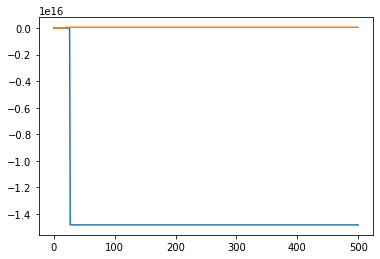

In [8]:
plt.figure()
plt.plot(d[0]['loss'])
plt.plot(d[1]['loss'])
# plt.yscale('log')
plt.show()

In [8]:
torch.sin(torch.tensor(0.5)) + torch.cos(torch.tensor(0.5))

tensor(1.3570)

In [9]:
test.prediction(torch.Tensor([0.5, 0.5]))

tensor([[0.2053, 0.0924]])
tensor([[0.3310]], grad_fn=<MmBackward0>)
tensor([[0.4208]], grad_fn=<AddBackward0>)


In [13]:
test.ystd

tensor(0.2326, dtype=torch.float64)

### Testing Calculations of Inverse and Determinant

In [7]:
sigma = torch.tensor(1E-1)
ndata = 10
ninducing = 5

r1 = torch.randn(ninducing, ninducing)

M = r1 @ r1.t()
Q = torch.randn(ndata, ninducing)

In [8]:
# calculation of inverse 
matrix = M + sigma**-2 * Q.t() @ Q
mat_chol = torch.linalg.cholesky(matrix)

In [9]:
torch.cholesky_solve(Q.t(), mat_chol)

tensor([[ 5.1687e-04,  3.5440e-04, -6.4981e-04,  1.5919e-03,  9.9443e-04,
         -1.6065e-03,  1.6110e-04,  1.3738e-03,  1.6088e-04,  4.4948e-04],
        [ 2.1504e-03, -7.5677e-04, -4.0080e-04,  3.8946e-04,  1.8774e-04,
          1.8366e-03,  3.7895e-04,  2.1066e-04, -1.3715e-03,  8.5900e-04],
        [ 4.5329e-04, -4.8128e-04, -2.1729e-03,  2.5971e-04,  2.2890e-03,
          4.5351e-04, -1.5874e-03, -1.1290e-03,  1.6271e-03,  1.6669e-03],
        [ 2.3003e-03, -4.0847e-04,  4.1724e-05, -1.4161e-03, -1.7573e-03,
         -7.0819e-04, -6.4921e-04,  1.1266e-03, -3.6296e-04,  5.2817e-03],
        [-1.0991e-04, -1.7393e-03, -2.2323e-03, -1.0690e-03,  3.4894e-03,
         -1.7454e-03, -9.6856e-04, -1.2405e-03, -1.1097e-03,  1.6988e-04]])

In [10]:
torch.linalg.inv(matrix) @ Q.t()

tensor([[ 5.1687e-04,  3.5440e-04, -6.4981e-04,  1.5919e-03,  9.9443e-04,
         -1.6065e-03,  1.6110e-04,  1.3738e-03,  1.6088e-04,  4.4948e-04],
        [ 2.1504e-03, -7.5677e-04, -4.0080e-04,  3.8946e-04,  1.8774e-04,
          1.8366e-03,  3.7895e-04,  2.1066e-04, -1.3715e-03,  8.5900e-04],
        [ 4.5329e-04, -4.8128e-04, -2.1729e-03,  2.5971e-04,  2.2890e-03,
          4.5351e-04, -1.5874e-03, -1.1290e-03,  1.6271e-03,  1.6669e-03],
        [ 2.3003e-03, -4.0847e-04,  4.1724e-05, -1.4161e-03, -1.7573e-03,
         -7.0819e-04, -6.4921e-04,  1.1266e-03, -3.6296e-04,  5.2817e-03],
        [-1.0991e-04, -1.7393e-03, -2.2323e-03, -1.0690e-03,  3.4894e-03,
         -1.7454e-03, -9.6856e-04, -1.2405e-03, -1.1097e-03,  1.6988e-04]])

In [11]:
# calculation of determinant 
mat_det_v1 = sigma**2 * torch.eye(ndata) + Q @ torch.linalg.inv(M) @ Q.t()

M_chol = torch.linalg.cholesky(M)
mat_det_v2 = sigma**2 * torch.eye(ndata) + Q @ torch.cholesky_solve(Q.t(), M_chol)

mat_det_v3 = sigma**2 * torch.eye(ndata) + Q @ torch.linalg.solve(M, Q.t())

In [12]:
torch.det(mat_det_v1)

tensor(4.2321e-07)

In [13]:
torch.det(mat_det_v2)

tensor(4.1962e-07)

In [14]:
torch.det(mat_det_v3)

tensor(4.2218e-07)

In [15]:
torch.logdet(mat_det_v1)

tensor(-14.6754)

In [16]:
torch.logdet(mat_det_v2)

tensor(-14.6839)

In [18]:
torch.logdet(mat_det_v3)

tensor(-14.6778)

In [20]:
sigma_inv = sigma**-2 * torch.eye(ndata)

In [21]:
mat1 = Q.t() @ sigma_inv @ Q + M 

In [22]:
2*ndata*torch.log(sigma) + torch.logdet(mat1) - torch.logdet(M)

tensor(-14.6800)

In [24]:
def logdetcalc(chol_factor):
    return 2 * torch.sum(torch.log(torch.diag(chol_factor)))

In [26]:
mat1_chol = torch.linalg.cholesky(mat1)

In [27]:
2*ndata*torch.log(sigma) + logdetcalc(mat1_chol) - logdetcalc(M_chol)

tensor(-14.6800)